<a href="https://colab.research.google.com/github/ianmuchai/Global-Energy-Usage/blob/main/Global_Energy_Usage_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving worldometers_energy.csv to worldometers_energy.csv


In [4]:
file_name='worldometers_energy.csv'

In [5]:
data=pd.read_csv(file_name)

In [6]:
data.head()

,name,energy_consumption_btu,world_share,pc_yearly_btu,non_renewable,oil_consump,gas_consump,coal_consump,re_nuclear,co2_emissions_tons_2016,...,oil_reserves,oil_production,oil_consumption,oil_imports,oil_exports,oil_net_imports,oil_year,oil_units,oil_net_exports,oil_daily_deficit/surplus
0,Singapore,3.630380e+12,0.62%,636011.0,100%,86%,13%,0%,0%,48381759.0,...,0.000000e+00,42274.0,1357000.0,1056958.0,27033.0,1029925.0,2016.0,Barrels,NaN,-1314726.0
1,Poland,4.334470e+12,0.74%,114206.0,99%,30%,16%,53%,1%,296659670.0,...,1.377520e+08,53367.0,582161.0,494777.0,4490.0,490287.0,2016.0,Barrels,NaN,-528794.0
2,Argentina,3.867520e+12,0.66%,88024.0,87%,40%,47%,1%,13%,200708270.0,...,2.379702e+09,708770.0,709000.0,16180.0,53930.0,NaN,2016.0,Barrels,37750.0,-230.0
3,Netherlands,3.938130e+12,0.68%,231364.0,95%,50%,35%,10%,5%,163419285.0,...,1.408920e+08,70128.0,937098.0,1090438.0,6585.0,1083853.0,2016.0,Barrels,NaN,-866970.0
4,Kazakhstan,3.574850e+12,0.61%,197724.0,97%,18%,16%,64%,3%,231919540.0,...,3.000000e+10,1698280.0,325000.0,469.0,1245575.0,NaN,2016.0,Barrels,1245106.0,1373280.0


In [7]:
import numpy as np

# Function to check columns that have percentages and to convert percentage string to float
def convert_percentage_to_float(df, column):
    if column in df.columns:
        df[column] = df[column].str.rstrip('%').astype('float') / 100
    return df

In [8]:
# List of columns that are in percentage format
percentage_columns = ['world_share', 'non_renewable', 'oil_consump', 'gas_consump',
                      'coal_consump', 're_nuclear']

In [9]:
# Converting percentage columns
for col in percentage_columns:
    data = convert_percentage_to_float(data, col)


In [10]:
# Checking for missing values, data types, and summary statistics
missing_values = data.isnull().sum()
data_types = data.dtypes
summary_statistics = data.describe()

missing_values, data_types, summary_statistics


(name                             0
 energy_consumption_btu           4
 world_share                      4
 pc_yearly_btu                    4
 non_renewable                    4
 oil_consump                      4
 gas_consump                      4
 coal_consump                     4
 re_nuclear                       4
 co2_emissions_tons_2016          3
 co2_emiss_one_year_change        3
 population_2016                  3
 co2_emiss_per_capita             3
 country_share_of_world_co2       3
 coal_reserves                    5
 coal_production                  5
 coal_consumption                 5
 coal_imports                     5
 coal_exports                     5
 coal_net_imports               104
 coal_year                        5
 coal_units                       5
 coal_net_exports               190
 coal_yearly_deficit/surplus      5
 gas_reserves                     6
 gas_production                   6
 gas_consumption                  6
 gas_imports                

In [11]:
# Checking the proportion of missing values in each column
missing_percentage = (missing_values / len(data)) * 100



In [12]:
# Focusing on columns with a significant amount of missing data (more than 10%)
significant_missing = missing_percentage[missing_percentage > 10].sort_values(ascending=False)
significant_missing

coal_net_exports    89.622642
gas_net_exports     76.886792
gas_net_imports     69.811321
oil_net_imports     66.037736
coal_net_imports    49.056604
oil_net_exports     36.320755
dtype: float64

In [13]:
# Dropping columns with significant missing values
columns_to_drop = significant_missing.index.tolist()
data_cleaned = data.drop(columns=columns_to_drop)


In [14]:
# Checking the data types after conversion and the shape of the dataframe after dropping columns
converted_data_types = data_cleaned.dtypes
cleaned_shape = data_cleaned.shape

converted_data_types, cleaned_shape

(name                            object
 energy_consumption_btu         float64
 world_share                    float64
 pc_yearly_btu                  float64
 non_renewable                  float64
 oil_consump                    float64
 gas_consump                    float64
 coal_consump                   float64
 re_nuclear                     float64
 co2_emissions_tons_2016        float64
 co2_emiss_one_year_change       object
 population_2016                float64
 co2_emiss_per_capita           float64
 country_share_of_world_co2      object
 coal_reserves                  float64
 coal_production                float64
 coal_consumption               float64
 coal_imports                   float64
 coal_exports                   float64
 coal_year                      float64
 coal_units                      object
 coal_yearly_deficit/surplus    float64
 gas_reserves                   float64
 gas_production                 float64
 gas_consumption                float64


In [15]:
# Broadening the scope of the analysis with more variables
extended_variables = [
    'energy_consumption_btu', 'world_share', 'pc_yearly_btu',
    'non_renewable', 'oil_consump', 'gas_consump', 'coal_consump', 're_nuclear',
    'co2_emissions_tons_2016', 'co2_emiss_per_capita', 'population_2016',
    'coal_reserves', 'coal_production', 'coal_consumption', 'coal_imports', 'coal_exports',
    'gas_reserves', 'gas_production', 'gas_consumption', 'gas_imports', 'gas_exports',
    'oil_reserves', 'oil_production', 'oil_consumption', 'oil_imports', 'oil_exports'
]

In [17]:
# Calculating the correlation matrix with the extended set of variables
correlation_matrix_extended = data_cleaned[extended_variables].corr()

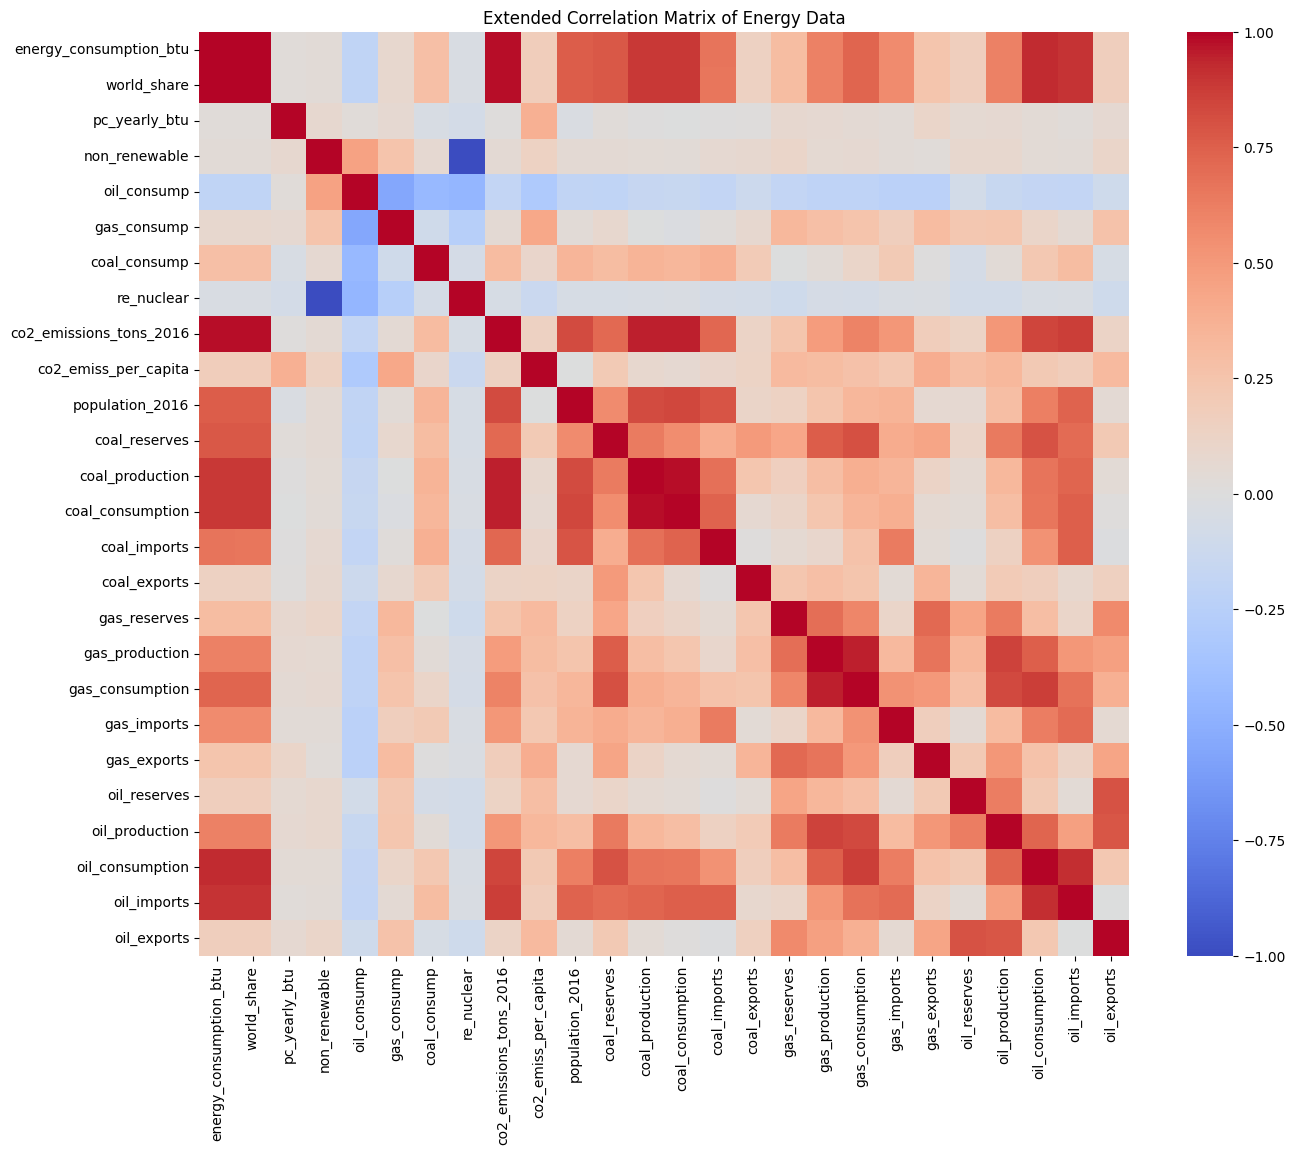

In [18]:
# Displaying the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_extended, annot=False, cmap='coolwarm')
plt.title("Extended Correlation Matrix of Energy Data")
plt.show()

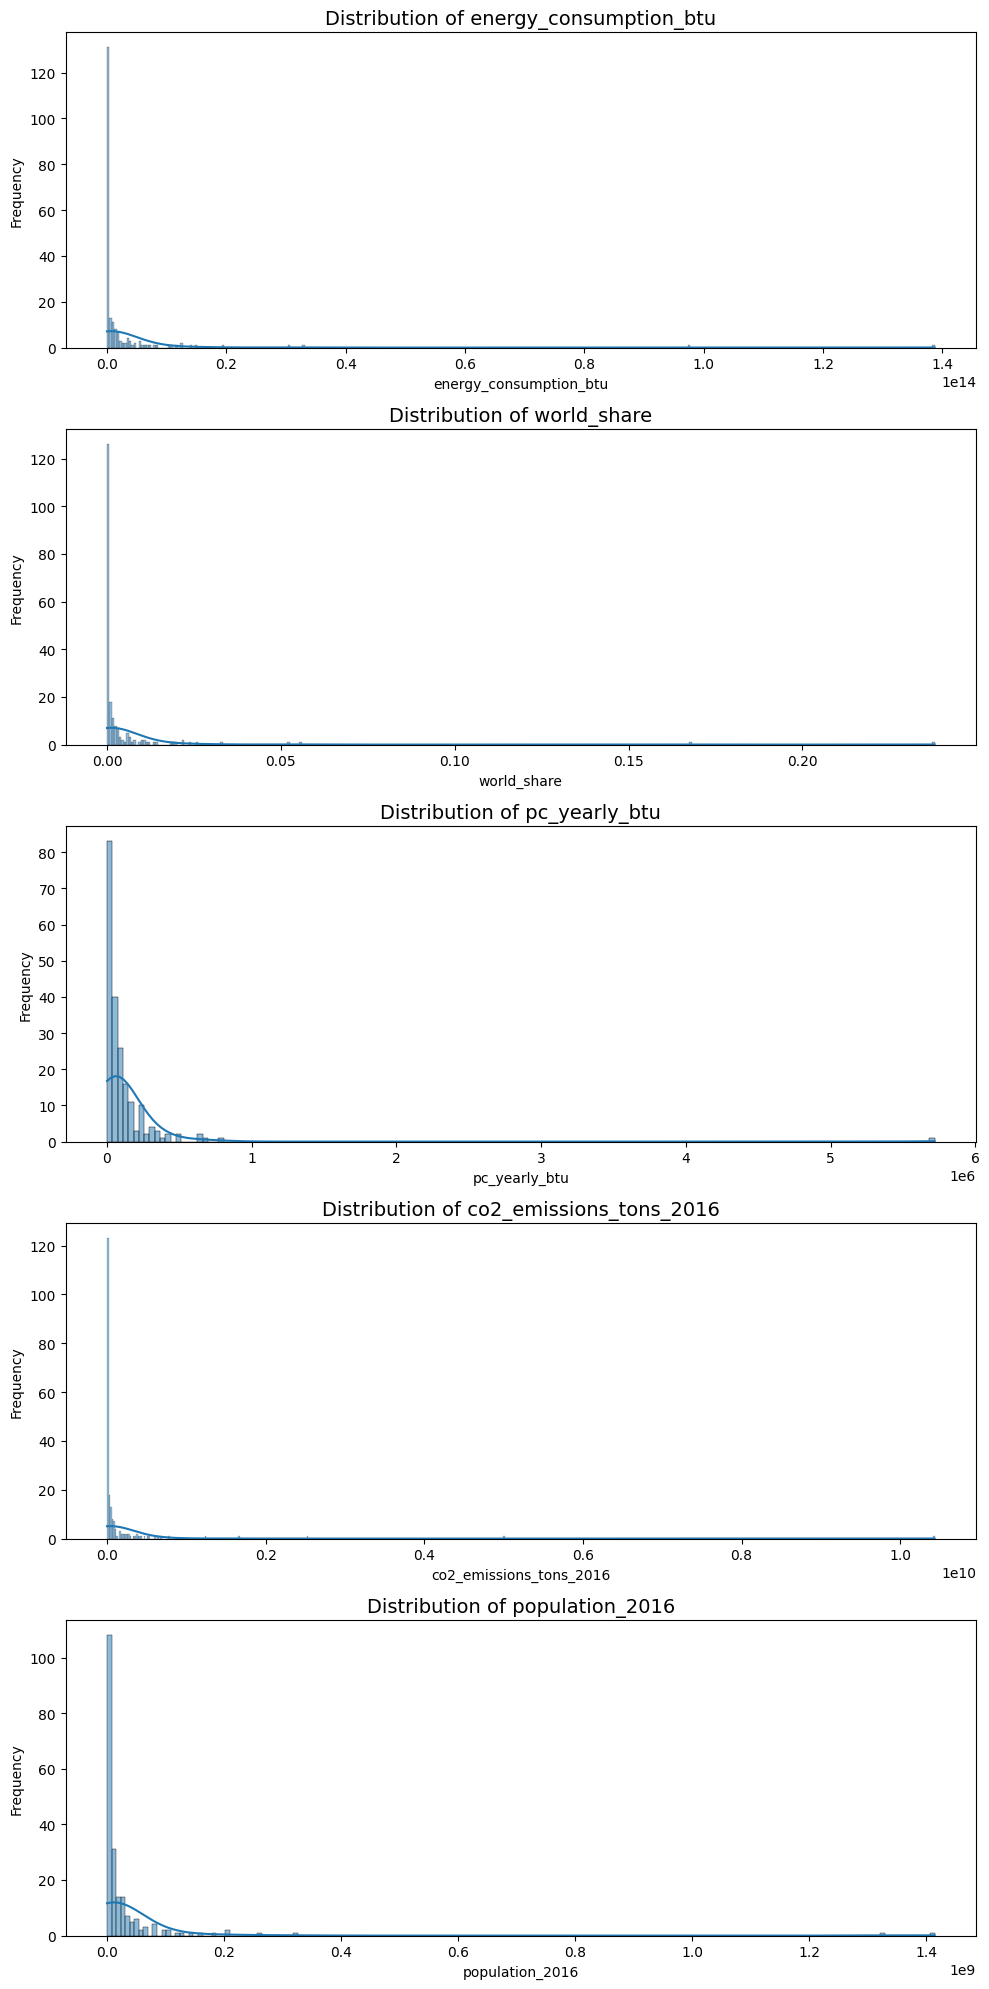

In [20]:
# Generating distribution plots for a subset of the extended variables
subset_variables = ['energy_consumption_btu', 'world_share', 'pc_yearly_btu', 'co2_emissions_tons_2016', 'population_2016']
fig, axes = plt.subplots(len(subset_variables), 1, figsize=(10, 20))

for i, var in enumerate(subset_variables):
    sns.histplot(data_cleaned[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()